> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDB-Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### TMBD-MOVIES Dataset

This file contains information about more than 10,000 moovies gathered from the database of the famous movies website (TMBD) which rate movies according to users votes, it includes columns like budget, revenue, rating and more detailed information about every movie.
● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|)characters.
● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,accounting for inflation over time.

### Question(s) for Analysis

Which genres are most popular from year to year?
Average between budget and revenue per generes?
What kinds of properties are associated with movies that have high revenues?
What's top 10 budget over years?
What's lowest 10 revenue over years?
What's higest genre's profit?
Which highest year to achive profit?

Let's discover it all together.


In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_movies=pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df_movies.shape
print('This dataset contains {} rows and {} columns.'.format(df_movies.shape[0],df_movies.shape[1]))

This dataset contains 10866 rows and 21 columns.


In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


To obtain some statistic information about our dataset.

In [7]:
df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

To know the data types of the columns in our dataset.

In [8]:
#to drop the unnecessary columns.
df_movies.drop(['imdb_id','original_title','cast','homepage','director','tagline','keywords','overview','production_companies','budget_adj','revenue_adj'],axis=1,inplace=True)
df_movies.head()

,id,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [9]:
print('This dataset contains {} rows and {} columns after dropping the unnecessary columns.'.format(df_movies.shape[0],df_movies.shape[1]))

This dataset contains 10866 rows and 10 columns after dropping the unnecessary columns.


In [10]:
print('The number of duplicated rows is {}.'.format(df_movies.duplicated().sum()))

The number of duplicated rows is 1.


I will drop the duplicted rows.

In [11]:
df_movies.drop_duplicates(inplace=True)

In [12]:
#confirm there's no more duplicated values.
df_movies.duplicated().sum()

0

In [13]:
#check nan value in whole dataset.
df_movies.isnull().sum()

id               0
popularity       0
budget           0
revenue          0
runtime          0
genres          23
release_date     0
vote_count       0
vote_average     0
release_year     0
dtype: int64

I have found 23 NAN value in genres column, so I'm going to drop them.

In [14]:
#to drop the nan value.
df_movies.dropna(inplace=True)

In [15]:
#confirm there are no more nan value.
df_movies.isnull().sum()

id              0
popularity      0
budget          0
revenue         0
runtime         0
genres          0
release_date    0
vote_count      0
vote_average    0
release_year    0
dtype: int64

In [16]:
#to ensure the number of rows remaining after the wrangling.
df_movies.shape

(10842, 10)

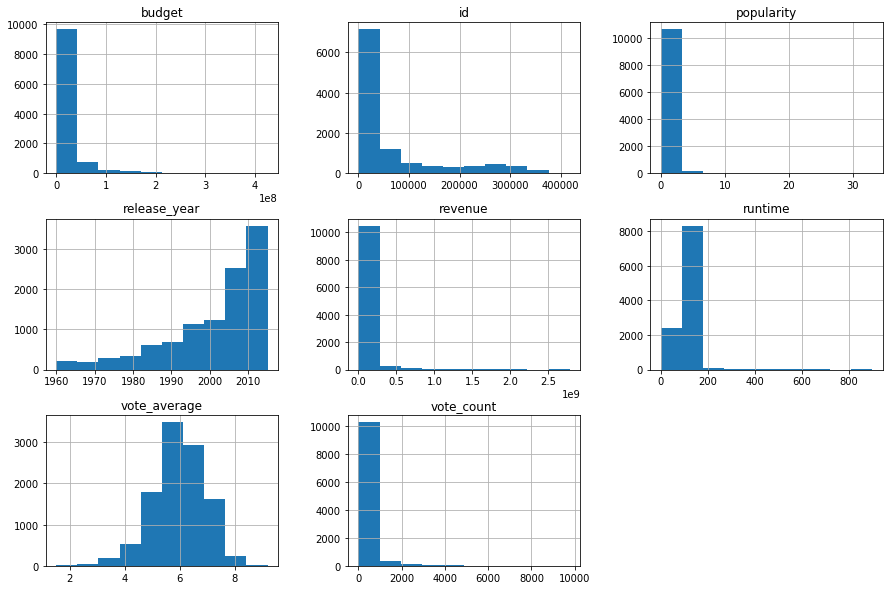

In [17]:
df_movies.hist(figsize=(15,10));

To have an overview look on the whole dataset.

In [18]:
df_movies.tail()

,id,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year
10861,21,0.080598,0,0,95,Documentary,6/15/66,11,7.4,1966
10862,20379,0.065543,0,0,176,Action|Adventure|Drama,12/21/66,20,5.7,1966
10863,39768,0.065141,0,0,94,Mystery|Comedy,1/1/66,11,6.5,1966
10864,21449,0.064317,0,0,80,Action|Comedy,11/2/66,22,5.4,1966
10865,22293,0.035919,19000,0,74,Horror,11/15/66,15,1.5,1966


When I have checked the tail of the dataset I have found 0 value in the budget, revenue, and runtime columns.

In [19]:
df_movies.query('budget == 0')

,id,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year
30,280996,3.927333,0,29355203,103,Mystery|Drama,6/19/15,425,6.4,2015
36,339527,3.358321,0,22354572,101,Crime|Drama|Mystery,9/3/15,474,6.2,2015
72,284289,2.272044,0,45895,95,Thriller,4/17/15,81,5.5,2015
74,347096,2.165433,0,0,108,Action|Adventure|Fantasy,6/24/15,27,5.1,2015
75,308369,2.141506,0,0,105,Comedy|Drama,6/12/15,569,7.7,2015
88,301875,1.959765,0,2000000,101,Drama|Romance|Science Fiction,9/4/15,135,5.6,2015
92,370687,1.876037,0,0,0,Fantasy|Action|Adventure,12/19/15,11,5.4,2015
95,258509,1.841779,0,233755553,92,Adventure|Animation|Comedy|Family,12/17/15,278,5.7,2015
100,326359,1.724712,0,0,8,Adventure|Animation|Family,3/9/15,475,7.0,2015
101,254302,1.661789,0,0,119,Action|Drama|Science Fiction,9/26/15,161,5.4,2015


The number of zero value in budget column is 5674 rows.

In [20]:
df_movies.query('revenue == 0')

,id,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year
48,265208,2.932340,30000000,0,92,Thriller|Crime|Drama,1/14/15,481,5.3,2015
67,334074,2.331636,20000000,0,96,Crime|Thriller|Action,5/21/15,280,5.4,2015
74,347096,2.165433,0,0,108,Action|Adventure|Fantasy,6/24/15,27,5.1,2015
75,308369,2.141506,0,0,105,Comedy|Drama,6/12/15,569,7.7,2015
92,370687,1.876037,0,0,0,Fantasy|Action|Adventure,12/19/15,11,5.4,2015
93,307663,1.872696,10000000,0,96,Thriller|Science Fiction|Action|Adventure,1/16/15,181,4.1,2015
100,326359,1.724712,0,0,8,Adventure|Animation|Family,3/9/15,475,7.0,2015
101,254302,1.661789,0,0,119,Action|Drama|Science Fiction,9/26/15,161,5.4,2015
103,292040,1.646664,0,0,104,Thriller|Action,4/11/15,114,5.6,2015
116,297291,1.380320,0,0,105,Action|Fantasy|Adventure,1/9/15,22,4.5,2015


In [21]:
df_movies.query('runtime == 0')

,id,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year
92,370687,1.876037,0,0,0,Fantasy|Action|Adventure,12/19/15,11,5.4,2015
334,361931,0.357654,0,0,0,Documentary,11/9/15,80,6.5,2015
410,339342,0.097514,0,0,0,Horror,1/1/15,15,5.6,2015
445,353345,0.218528,0,0,0,Horror,10/9/15,52,5.0,2015
486,333653,0.176744,0,0,0,TV Movie|Drama,4/5/15,11,5.4,2015
595,341051,0.028725,0,0,0,Horror,1/1/15,11,4.6,2015
616,325843,0.026797,0,0,0,Drama|Comedy,11/10/15,20,6.6,2015
1241,296370,0.135376,0,0,0,Romance|Music|Comedy,1/1/14,18,5.7,2014
1289,286372,0.037459,3250000,0,0,Thriller|Horror|Mystery,10/20/14,16,3.4,2014
1293,286256,0.036904,0,0,0,Documentary|Drama|Music,10/30/14,14,6.0,2014


The number of zero value in revenue column is 5993 rows.

Now I'm going to drop zeros value in both budget and revenue as the number is approximately half of the data samples.

In [22]:
#convert 0 value to nan value to be able to drop it in both budget and revenue columns.
df_movies['budget']=df_movies['budget'].replace(0,np.NAN)
df_movies['revenue']=df_movies['revenue'].replace(0,np.NAN)
df_movies['runtime']=df_movies['runtime'].replace(0,np.NAN)

df_movies.dropna(inplace=True)

In [23]:
#to see the remaining rows after all cleaning process is done.
df_movies.shape

(3854, 10)


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [24]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies.head()

,id,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


To convert the data type of the release_date to a datetime type.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Which genres are most popular from year to year?!)

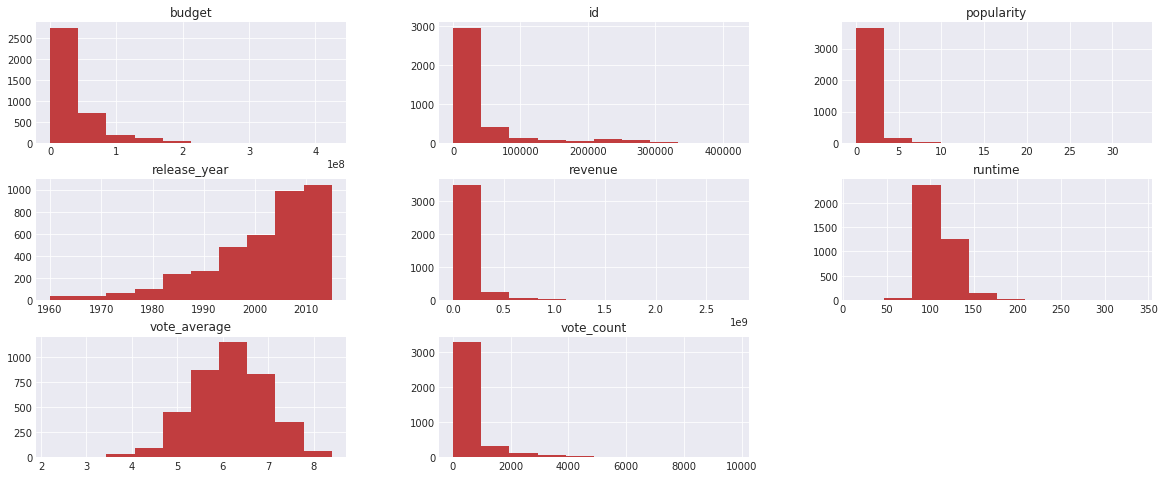

In [25]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
sns.set_style('darkgrid')
sns.set_palette("Set1", 20, .65)

df_movies.hist(figsize=(20,8));

In [26]:
df_genres = (df_movies['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_genres

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
5,Western,Drama,Adventure,Thriller,None
6,Science Fiction,Action,Thriller,Adventure,None
7,Drama,Adventure,Science Fiction,None,None
8,Family,Animation,Adventure,Comedy,None
9,Comedy,Animation,Family,None,None


To split the the values inside the genres columns to separated genres_ columns.

In [27]:
df_movies=df_movies.join([df_genres])
df_movies.head()

,id,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,genres_1,genres_2,genres_3,genres_4,genres_5
0,135397,32.985763,150000000.0,1.513529e+09,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,Action,Adventure,Science Fiction,Thriller,None
1,76341,28.419936,150000000.0,3.784364e+08,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,Action,Adventure,Science Fiction,Thriller,None
2,262500,13.112507,110000000.0,2.952382e+08,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,Adventure,Science Fiction,Thriller,None,None
3,140607,11.173104,200000000.0,2.068178e+09,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,Action,Adventure,Science Fiction,Fantasy,None
4,168259,9.335014,190000000.0,1.506249e+09,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,Action,Crime,Thriller,None,None


In [28]:
def p_label(xlabel,ylabel,title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

To gather all the separated geners_ into the dataset

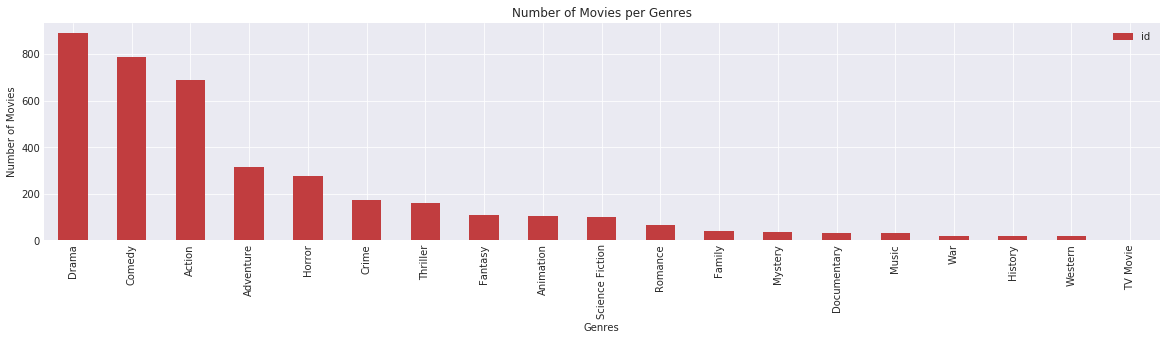

In [29]:
#Number of movies per genre. 

fig,ax=plt.subplots(figsize=(20,4))
df_movies.groupby(['genres_1']).count()['id'].sort_values(ascending=False).plot.bar()
p_label('Genres','Number of Movies','Number of Movies per Genres');

Here we got our answer for the first question, that Drama is the most genre released over years, but is it the most popular as well?!!

In [30]:
df_movies.groupby('genres_1')['popularity'].mean().sort_values(ascending=False)

genres_1
Science Fiction    1.931437
Adventure          1.905525
Animation          1.712723
War                1.658497
Family             1.609295
Fantasy            1.581660
Action             1.442326
History            1.442235
Romance            1.369972
Western            1.193918
Thriller           1.171430
Mystery            1.133780
Crime              1.074895
Drama              0.927571
Comedy             0.914765
Music              0.914098
Horror             0.855787
Documentary        0.289461
TV Movie           0.273628
Name: popularity, dtype: float64

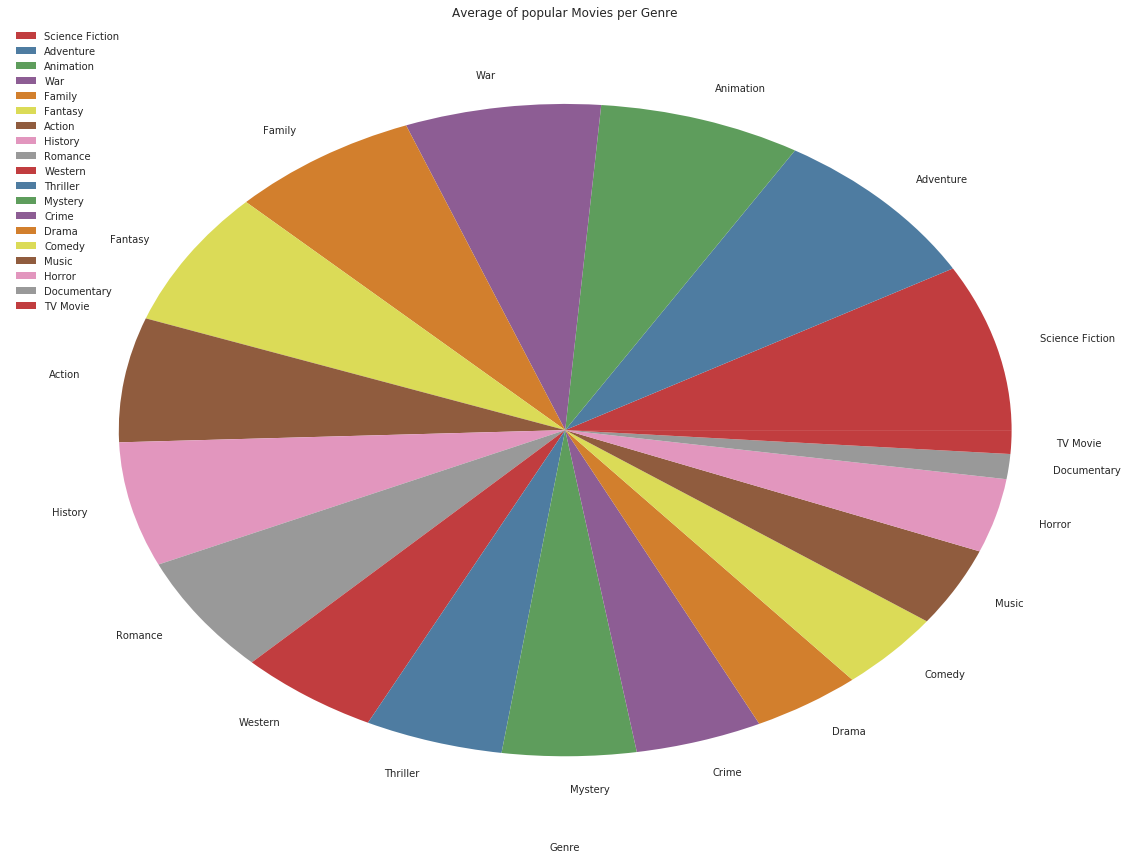

In [31]:
#Average of popular movies per genre.

df_movies.groupby('genres_1')['popularity'].mean().sort_values(ascending=False).plot.pie(figsize = (20,15))
p_label('Genre','','Average of popular Movies per Genre');

OOhhh, Science Fiction is more popular than Drama which is the most produced.

### Research Question 2  (Average between budget and revenue per generes?!)

Here, we'd like to show the relation between avergae of buget over the revenue to show which is the most successful genres!!

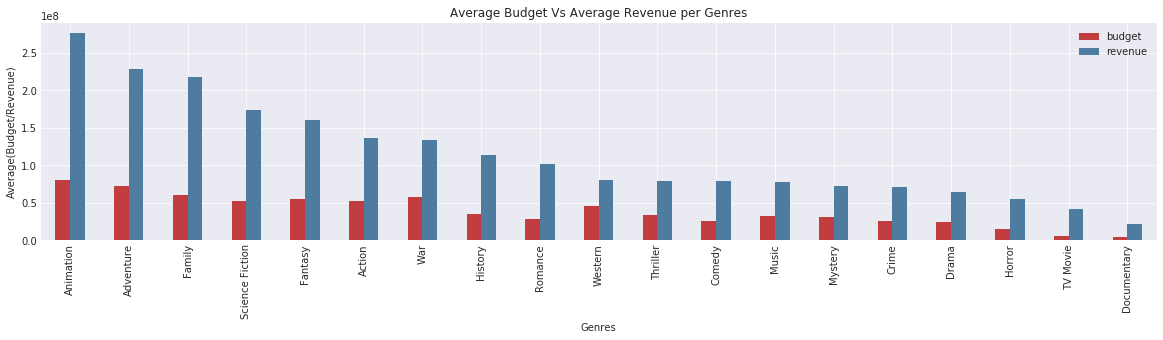

In [32]:
#Average budget and revenue of each genres' movies.

fig,ax=plt.subplots(figsize=(20,4))
df_movies[['genres_1','budget','revenue']].groupby(['genres_1']).mean().sort_values(['revenue','budget'], ascending=False).plot(kind="bar",ax=ax);
ax.set(xlabel='Genres',ylabel ='Average(Budget/Revenue)',title ='Average Budget Vs Average Revenue per Genres')
plt.legend();

So let's see also the top 5 years of prducing movies!!

In [33]:
df_movies.groupby(['release_year']).count()['id'].sort_values(ascending=False).head(5)

release_year
2011    199
2013    180
2010    178
2009    174
2006    169
Name: id, dtype: int64

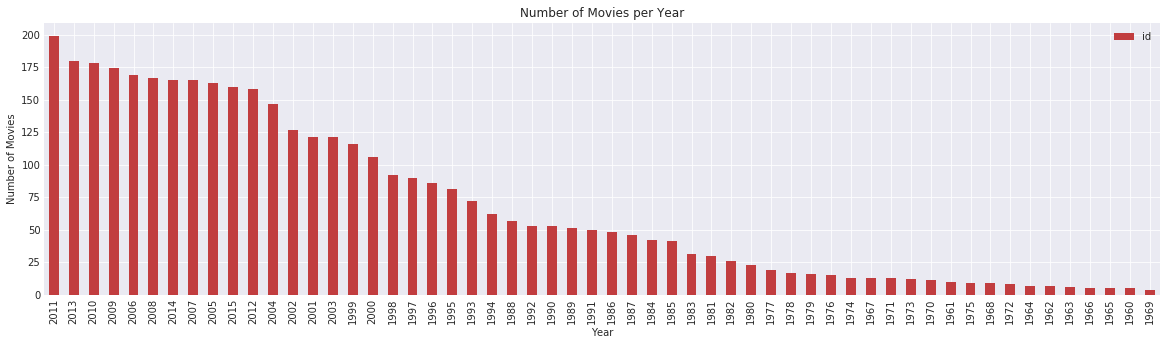

In [34]:
#Number of movies per year. 

fig,ax=plt.subplots(figsize=(20,5))
df_movies.groupby(['release_year']).count()['id'].sort_values(ascending=False).plot.bar()
p_label('Year','Number of Movies','Number of Movies per Year');

It looks that 2011 have the higest number with 199 movie. 

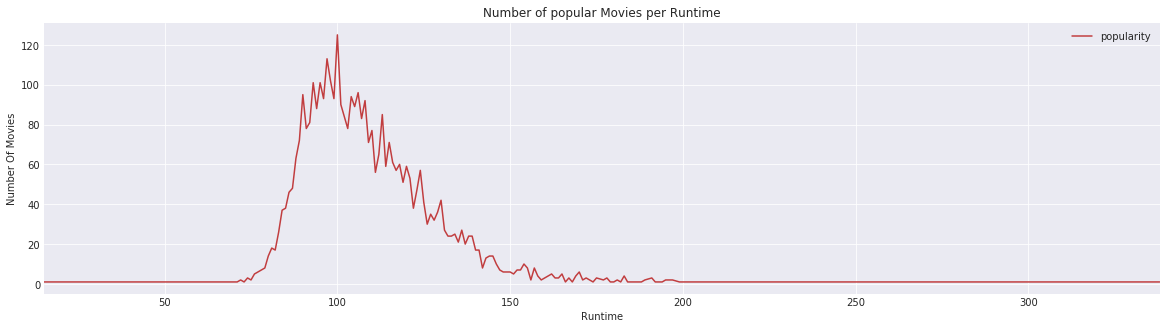

In [35]:
#Number of popular movies per runtime.

df_movies.groupby('runtime')['popularity'].count().plot(figsize=(20,5))
p_label('Runtime','Number Of Movies','Number of popular Movies per Runtime');

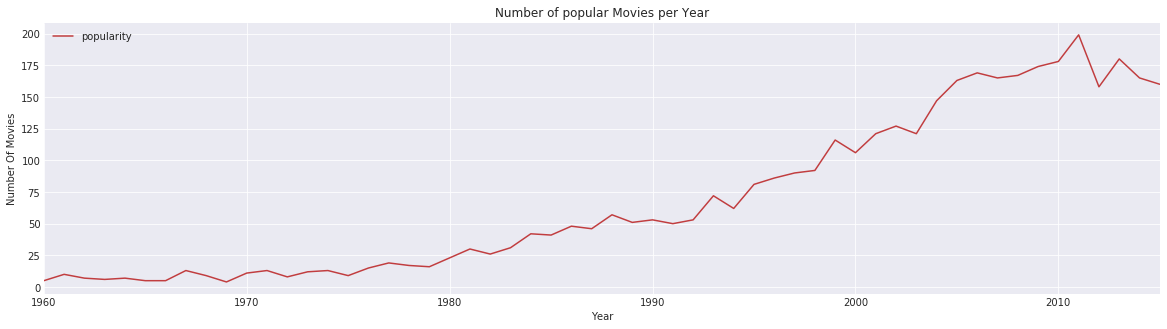

In [36]:
#Number of popular movies per year.

df_movies.groupby('release_year')['popularity'].count().plot(figsize = (20,5))
p_label('Year','Number Of Movies','Number of popular Movies per Year');

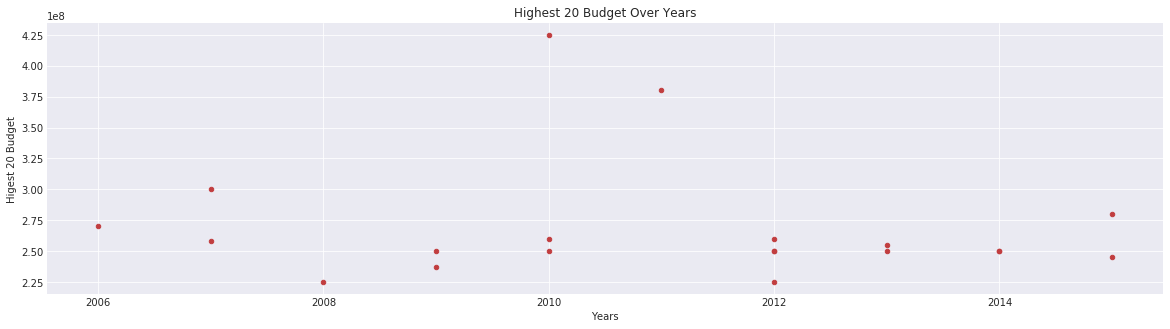

In [37]:
#Highest 20 Movies budget over years.

df_movies.nlargest(20,'budget').sort_values('budget').plot.scatter(x='release_year', y='budget',figsize = (20,5))
p_label('Years','Higest 20 Budget','Highest 20 Budget Over Years');

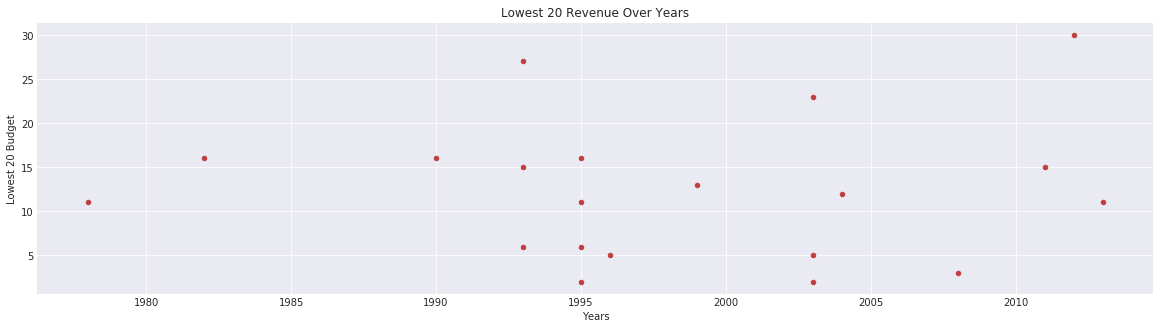

In [38]:
#Lowest 20 Movies revenue over years.

df_movies.nsmallest(20,'revenue').sort_values('revenue').plot.scatter(x='release_year', y='revenue',figsize = (20,5))
p_label('Years','Lowest 20 Budget','Lowest 20 Revenue Over Years');


### Research Question 3  (What's higest genre's profit??!)

In [39]:
#Top 5 Movie's revenue per genres.
#df_movies.groupby('genres_1').nlargest(10)
#.sort_values('revenue',ascending=False)

#plot.barh(x='genres_1', y='revenue',figsize = (20,5))
#df_movies.nlargest(5,'revenue').sort_values('revenue',ascending=False).plot.barh(x='genres_1', y='revenue',figsize = (20,5))
#p_label('Genres','Higest 20 Revenue per Genre','Highest 20 Budget Over Years');


We could see the highest revenu goes for Action movies, but do you think the profit as well!!!

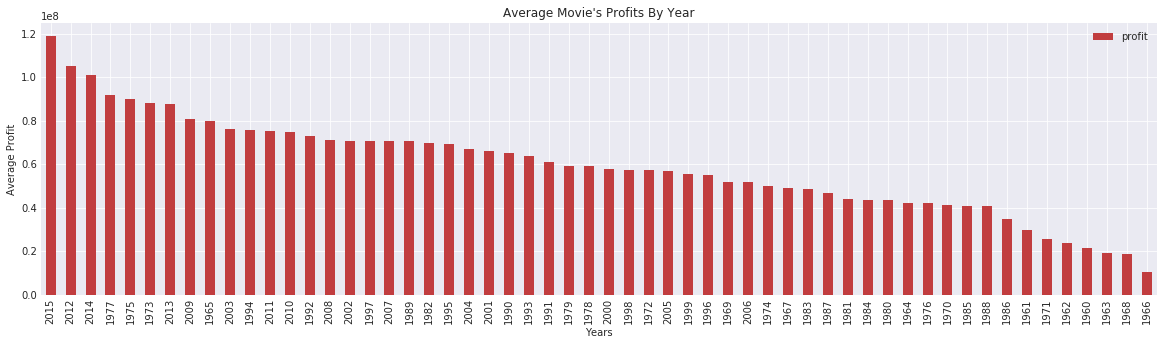

In [40]:
#Highest profit over years.

df_prof =df_movies[['budget','revenue','release_year','genres_1']].copy()
df_prof['profit']=df_prof.revenue - df_prof.budget
df_prof.groupby('release_year')['profit'].mean().sort_values(ascending=False).plot.bar(figsize=(20,5))
p_label('Years','Average Profit',"Average Movie's Profits By Year");

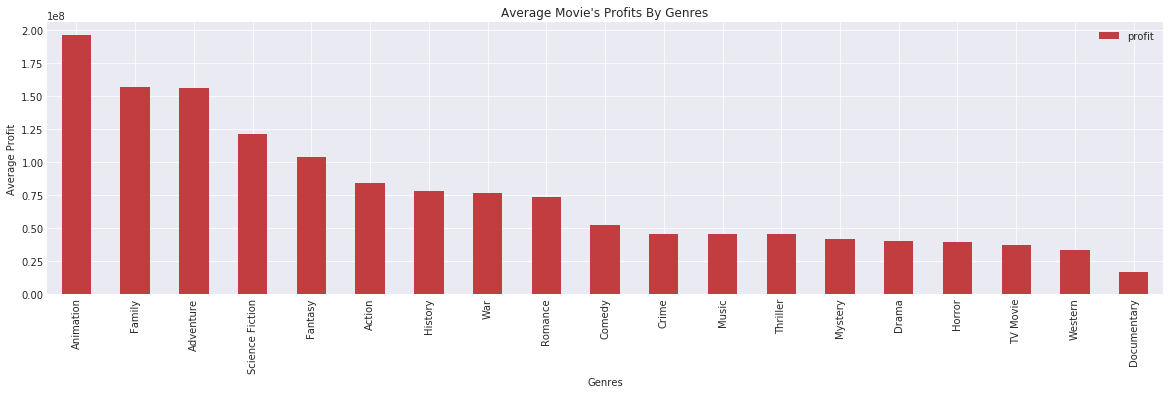

In [41]:
#Highest profit per genres.

df_prof.groupby('genres_1')['profit'].mean().sort_values(ascending=False).plot.bar(figsize=(20,5))
p_label('Genres','Average Profit',"Average Movie's Profits By Genres");


<a id='conclusions'></a>
## Conclusions

Finally, we had many usfel information after exploring our dataset and have many answers to our questions!!

1- Drama movies are the highest per years.
2- 2011 was the first rank year for prducing movies reached a 200 movie.
3- we compare the average between budget and revenue and found that Animation movies are the best investment.
4- Best movies in popularity which in between (100-120) minutes.
5- 2011 have the most popular movie.
6- Higest budget was in 2010 and the lowest was in 1995.
7- Action movies is the highest in budget.
8- 2015 was the most profit year.
9- Animantion are highest profit.

### Limitations
This analysis was done according to the popularity column which is essentially based on page views of pages related to a film, in which may not consider the right way to rate the movie as the top rank, as well there's a myriad of lost data in budget and revenue approximately half of the sample of the dataset which reduces the credibility of this analysis!!!

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255